<a href="https://colab.research.google.com/github/Shraddhamane1/Stock-Price-Predictor-/blob/main/NSEBANK_PRICE_PREDICTION_for_20062024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
stock = "^NSEBANK"
data = yf.download(stock, start, end)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-20,15064.450195,15195.549805,14978.500000,14997.650391,14997.476562,21900
2014-06-23,15014.200195,15148.000000,14940.349609,15076.349609,15076.174805,25000
2014-06-24,15142.349609,15341.950195,15142.349609,15309.500000,15309.322266,29100
2014-06-25,15320.950195,15320.950195,15221.150391,15237.849609,15237.672852,23400
2014-06-26,15247.099609,15333.250000,15020.650391,15050.000000,15049.825195,37300


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2.180000e+03
mean,30055.265219,30266.244006,29801.807059,30037.042975,30036.779209,1.131894e+06
std,9391.580493,9431.031402,9347.683951,9392.388060,9392.414814,3.898433e+07
min,13844.450195,13844.450195,13519.900391,13555.700195,13555.542969,0.000000e+00
25%,22557.725098,22677.612793,22238.600586,22466.062012,22465.800293,0.000000e+00
50%,28308.899414,28577.799805,28082.500000,28299.400391,28299.071289,0.000000e+00
75%,37241.575195,37698.211914,36878.375977,37320.875000,37320.441406,1.861500e+05
max,51712.898438,51957.000000,51281.500000,51783.250000,51783.250000,1.798102e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2014-06-20 to 2024-06-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2180 non-null   float64
 1   High       2180 non-null   float64
 2   Low        2180 non-null   float64
 3   Close      2180 non-null   float64
 4   Adj Close  2180 non-null   float64
 5   Volume     2180 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.2 KB


In [ ]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
closing_price = data[['Close']]
closing_price

,Close
Date,
2014-06-20,14997.650391
2014-06-23,15076.349609
2014-06-24,15309.500000
2014-06-25,15237.849609
2014-06-26,15050.000000
...,...
2024-06-13,49846.699219
2024-06-14,50002.000000
2024-06-18,50440.898438


Text(0.5, 1.0, 'Closing price of NSE Bank')

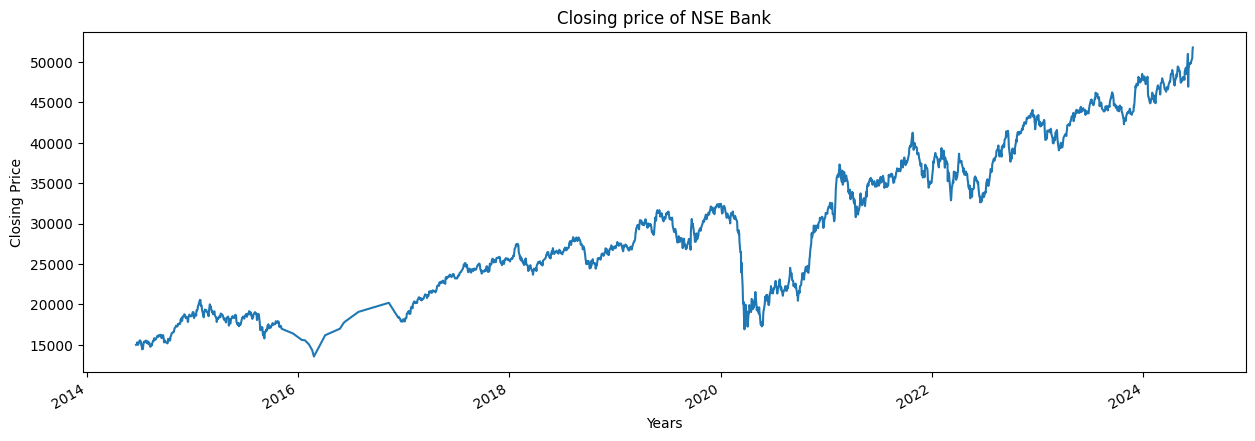

In [ ]:
plt.figure(figsize=(15,5))
closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Closing price of NSE Bank')


In [ ]:
#1,2,3,4,5,6,7,8,9,10

#MA 5 days for each value(CP) = null,null,null,null,3,4,5,...

In [ ]:
(2+3+4+5+6)//5

4

In [ ]:
for i in range(2014,2024):
  print(list(closing_price.index.year).count(i))

127
196
25
246
245
241
249
247
247
245


In [ ]:
closing_price['MA_for_365_days']= closing_price['Close'].rolling(365).mean()
closing_price['MA_for_365_days'].head()

<ipython-input-13-ce73542c0813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_for_365_days']= closing_price['Close'].rolling(365).mean()


Date
2014-06-20   NaN
2014-06-23   NaN
2014-06-24   NaN
2014-06-25   NaN
2014-06-26   NaN
Name: MA_for_365_days, dtype: float64

In [ ]:
closing_price['MA_for_365_days'][0:365].tail()

Date
2017-01-19             NaN
2017-01-20             NaN
2017-01-23             NaN
2017-01-24             NaN
2017-01-25    17590.491155
Name: MA_for_365_days, dtype: float64

Text(0.5, 1.0, 'Closing price of NSE Bank')

<Figure size 640x480 with 0 Axes>

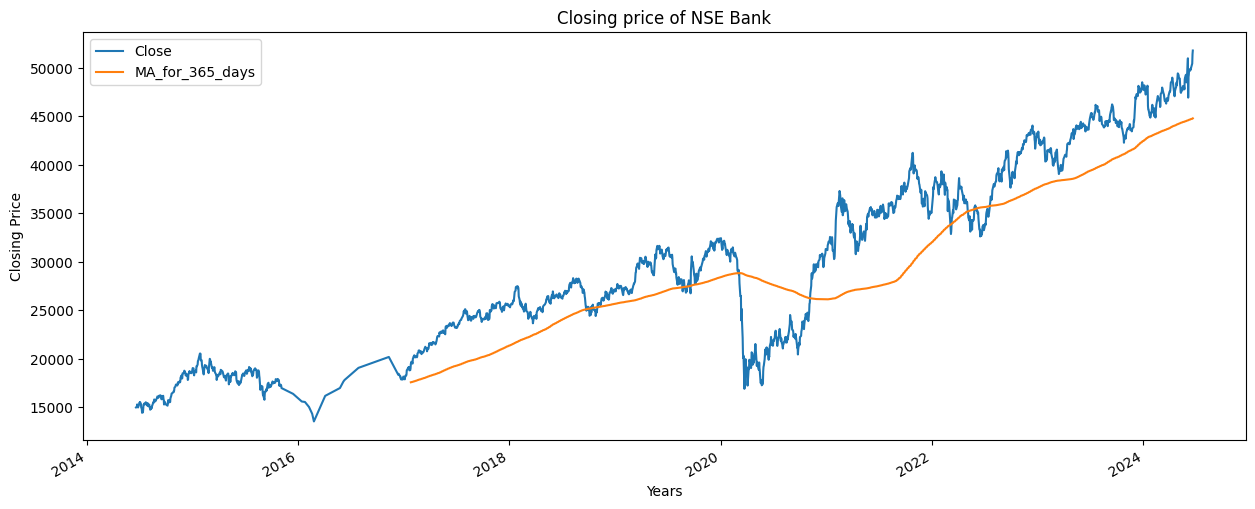

In [ ]:
plt.figure()
closing_price[['Close','MA_for_365_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Closing price of NSE Bank')

<ipython-input-17-2dbe783c6a04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_for_100_days'] = closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Closing price of NSE Bank')

<Figure size 640x480 with 0 Axes>

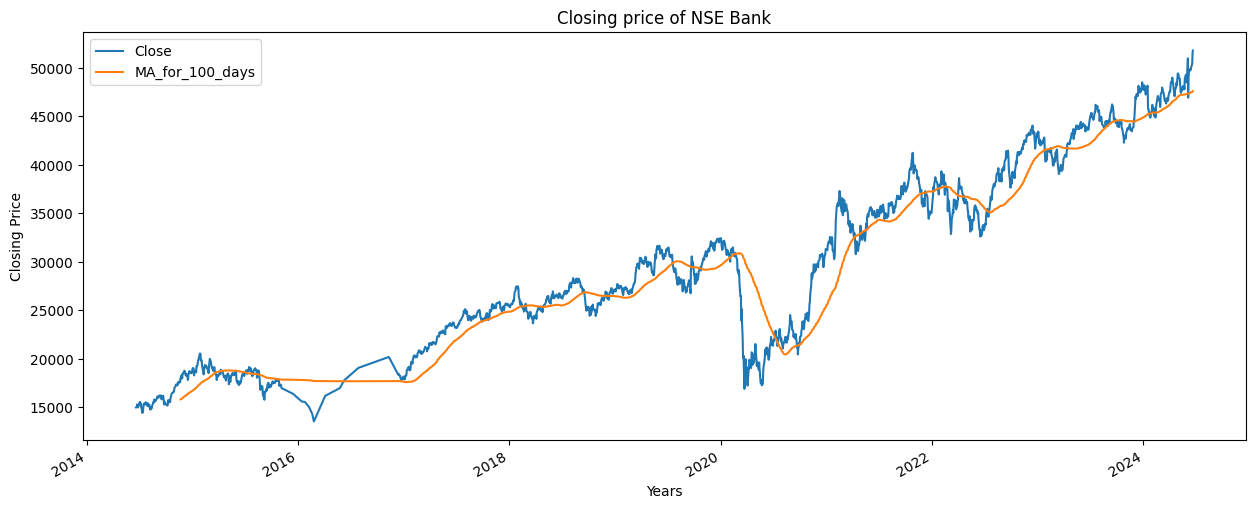

In [ ]:
closing_price['MA_for_100_days'] = closing_price['Close'].rolling(100).mean()
closing_price['MA_for_100_days'].head()
plt.figure()
closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Closing price of NSE Bank')

In [ ]:
# 1 to 100 ==> 101 day
# 2 to 101 (100 days) ==> 102 day
# 3 to 102 (100 days) ==> 103rd day future days close price using our model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['Close']])
scaled_data

array([[0.03772018],
       [0.03977889],
       [0.0458779 ],
       ...,
       [0.96488523],
       [0.98992352],
       [1.        ]])

In [ ]:
scaled_data.shape

(2180, 1)

In [ ]:
x_data = []
y_data = []
base_days = 100

for i in range(base_days, len(scaled_data)):
  x_data.append(scaled_data[i-base_days:i])
  y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0], y_data[0]

(array([[0.03772018],
        [0.03977889],
        [0.0458779 ],
        [0.04400359],
        [0.0390896 ],
        [0.03758152],
        [0.04410955],
        [0.04618788],
        [0.05060877],
        [0.04959644],
        [0.05233007],
        [0.04739774],
        [0.03771625],
        [0.03597927],
        [0.03311748],
        [0.02332088],
        [0.02443394],
        [0.03495385],
        [0.0447256 ],
        [0.04481976],
        [0.0479667 ],
        [0.04787777],
        [0.04896075],
        [0.04989333],
        [0.05175978],
        [0.04621143],
        [0.04333132],
        [0.04961605],
        [0.04478182],
        [0.04112478],
        [0.04412131],
        [0.04545282],
        [0.03800793],
        [0.03743764],
        [0.03165387],
        [0.03377406],
        [0.03926488],
        [0.03545088],
        [0.04012682],
        [0.04928513],
        [0.05150605],
        [0.05038251],
        [0.05510424],
        [0.05920992],
        [0.05528212],
        [0

In [ ]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]
x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1872, 100, 1)
(1872, 1)
(208, 100, 1)
(208, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [ ]:
model.fit(x_train,y_train, batch_size= 5, epochs= 10)

Epoch 1/10
375/375 [==============================] - 53s 124ms/step - loss: 0.0018
Epoch 2/10
375/375 [==============================] - 43s 116ms/step - loss: 6.0493e-04
Epoch 3/10
375/375 [==============================] - 44s 116ms/step - loss: 3.7597e-04
Epoch 4/10
375/375 [==============================] - 50s 133ms/step - loss: 3.7980e-04
Epoch 5/10
375/375 [==============================] - 44s 118ms/step - loss: 3.1404e-04
Epoch 6/10
375/375 [==============================] - 34s 92ms/step - loss: 3.6785e-04
Epoch 7/10
375/375 [==============================] - 34s 92ms/step - loss: 2.5364e-04
Epoch 8/10
375/375 [==============================] - 36s 95ms/step - loss: 2.2284e-04
Epoch 9/10
375/375 [==============================] - 34s 90ms/step - loss: 2.1688e-04
Epoch 10/10
375/375 [==============================] - 35s 93ms/step - loss: 2.0643e-04


In [ ]:
predictions = model.predict(x_test)
predictions

7/7 [==============================] - 2s 90ms/step


array([[0.8261408 ],
       [0.82363886],
       [0.8143624 ],
       [0.80551344],
       [0.80330735],
       [0.79990673],
       [0.7986642 ],
       [0.7977232 ],
       [0.8018422 ],
       [0.80150086],
       [0.81446356],
       [0.814527  ],
       [0.80683863],
       [0.81415796],
       [0.8142871 ],
       [0.806961  ],
       [0.8005641 ],
       [0.81311524],
       [0.81686866],
       [0.81497747],
       [0.81140244],
       [0.8242787 ],
       [0.83155197],
       [0.84210855],
       [0.839644  ],
       [0.8502668 ],
       [0.85235   ],
       [0.85828847],
       [0.85094166],
       [0.83480376],
       [0.8151349 ],
       [0.81637734],
       [0.82133275],
       [0.8172332 ],
       [0.8160519 ],
       [0.80827487],
       [0.8162518 ],
       [0.81125015],
       [0.7993915 ],
       [0.80668026],
       [0.810997  ],
       [0.79786503],
       [0.8108598 ],
       [0.81523925],
       [0.8169244 ],
       [0.8081823 ],
       [0.8067122 ],
       [0.812

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[45137.04 ],
       [45041.395],
       [44686.78 ],
       [44348.504],
       [44264.17 ],
       [44134.176],
       [44086.676],
       [44050.703],
       [44208.164],
       [44195.113],
       [44690.645],
       [44693.07 ],
       [44399.164],
       [44678.965],
       [44683.902],
       [44403.84 ],
       [44159.305],
       [44639.105],
       [44782.59 ],
       [44710.29 ],
       [44573.63 ],
       [45065.855],
       [45343.895],
       [45747.445],
       [45653.234],
       [46059.32 ],
       [46138.953],
       [46365.965],
       [46085.117],
       [45468.203],
       [44716.312],
       [44763.805],
       [44953.24 ],
       [44796.523],
       [44751.363],
       [44454.07 ],
       [44759.008],
       [44567.805],
       [44114.48 ],
       [44393.11 ],
       [44558.13 ],
       [44056.125],
       [44552.887],
       [44720.297],
       [44784.72 ],
       [44450.527],
       [44394.332],
       [44600.453],
       [44060.49 ],
       [43929.938],


In [ ]:
inv_y_test = scaler.inverse_transform(y_test)


In [ ]:
inv_predictions[:5], inv_y_test[:5]

(array([[45137.04 ],
        [45041.395],
        [44686.78 ],
        [44348.504],
        [44264.17 ]], dtype=float32),
 array([[44880.69921875],
        [44541.80078125],
        [44199.1015625 ],
        [44090.94921875],
        [43946.3984375 ]]))

In [ ]:
inv_predictions[:5], inv_y_test[:5]

(array([[45137.04 ],
        [45041.395],
        [44686.78 ],
        [44348.504],
        [44264.17 ]], dtype=float32),
 array([[44880.69921875],
        [44541.80078125],
        [44199.1015625 ],
        [44090.94921875],
        [43946.3984375 ]]))

In [ ]:
plotting_data = pd.DataFrame({
    'original_test_data': inv_y_test.reshape(-1),
    'predictions' : inv_predictions.reshape(-1),
    },
index = closing_price.index[len_train+100:])
plotting_data.head()

,original_test_data,predictions
Date,,
2023-08-09,44880.699219,45137.039062
2023-08-10,44541.800781,45041.394531
2023-08-11,44199.101562,44686.781250
2023-08-14,44090.949219,44348.503906
2023-08-16,43946.398438,44264.171875


Text(0.5, 1.0, 'Closing price of NSE BANK')

<Figure size 1500x600 with 0 Axes>

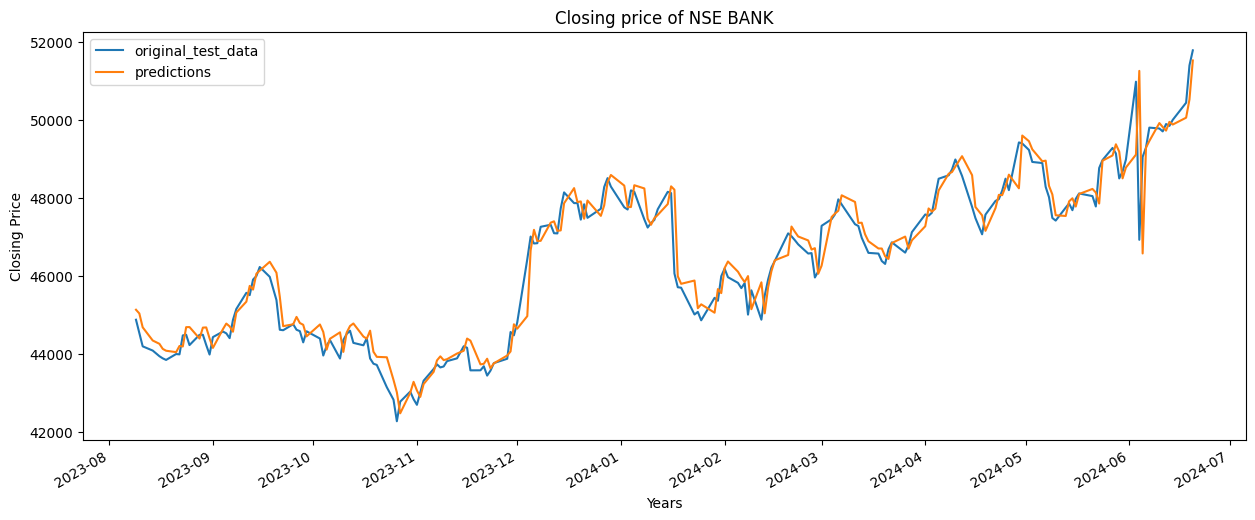

In [ ]:
plt.figure(figsize=(15,6))
plotting_data.plot(figsize= (15,6))
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.title('Closing price of NSE BANK')

In [ ]:
last_100 = closing_price[['Close']].tail(100)
last_100.tail()

,Close
Date,
2024-06-13,49846.699219
2024-06-14,50002.000000
2024-06-18,50440.898438
2024-06-19,51398.050781
2024-06-20,51783.250000


In [ ]:
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100

array([[[0.1225083 ],
        [0.1207153 ],
        [0.0215267 ],
        [0.03126309],
        [0.        ],
        [0.08330124],
        [0.07251615],
        [0.16345753],
        [0.1911928 ],
        [0.15972019],
        [0.13870005],
        [0.11921935],
        [0.13768073],
        [0.02108565],
        [0.11108733],
        [0.00232779],
        [0.09198217],
        [0.15066315],
        [0.19556602],
        [0.21955773],
        [0.32210757],
        [0.31133716],
        [0.29689492],
        [0.28127411],
        [0.2472642 ],
        [0.24893408],
        [0.15859244],
        [0.18139823],
        [0.34996595],
        [0.37442751],
        [0.39248398],
        [0.44805617],
        [0.42932033],
        [0.35588651],
        [0.34931539],
        [0.30578593],
        [0.27812238],
        [0.24980884],
        [0.24717723],
        [0.21955039],
        [0.20886639],
        [0.26293527],
        [0.28879171],
        [0.25069037],
        [0.27754411],
        [0

In [ ]:
last_100.shape

(1, 100, 1)

In [ ]:
day101 = model.predict(last_100)
day101

1/1 [==============================] - 0s 49ms/step


array([[1.0040809]], dtype=float32)

In [ ]:
scaler.inverse_transform(day101)

array([[51811.477]], dtype=float32)

In [ ]:
def predict_future(no_of_days,prev_100):
  future_predictions = []
  for i in range(no_of_days):
    next_day = model.predict(prev_100).tolist()
    future_predictions.append(next_day)
    prev_100 = np.append(prev_100[0][1:])

    future_predictions.append(scaler.inverse_transform(next_day))
  return future_predictions


In [ ]:
import numpy as np

# Assuming 'model' and 'scaler' are already defined and loaded

def predict_future(no_of_days, prev_100):
    future_predictions = []
    for i in range(no_of_days):
        # Reshape prev_100 for model prediction (assuming it's a numpy array)
        prev_100_reshaped = np.array(prev_100).reshape(1, 100, 1)

        # Predict next day's value
        next_day = model.predict(prev_100_reshaped)

        # Append the predicted value (scaled) to future_predictions
        future_predictions.append(scaler.inverse_transform(next_day)[0][0])

        # Update prev_100 for the next iteration (drop the oldest value and append the newest prediction)
        prev_100 = np.append(prev_100[1:], next_day)

    return future_predictions

# Example usage
no_of_days = 5
future_prediction = predict_future(no_of_days, last_100)
print(future_prediction)


1/1 [==============================] - 0s 40ms/step
[1.0040809, 0.9970146, 0.98819226, 0.9812003, 0.9762045]


Text(0.5, 1.0, 'Future Close price of NSE BANK ')

<Figure size 640x480 with 0 Axes>

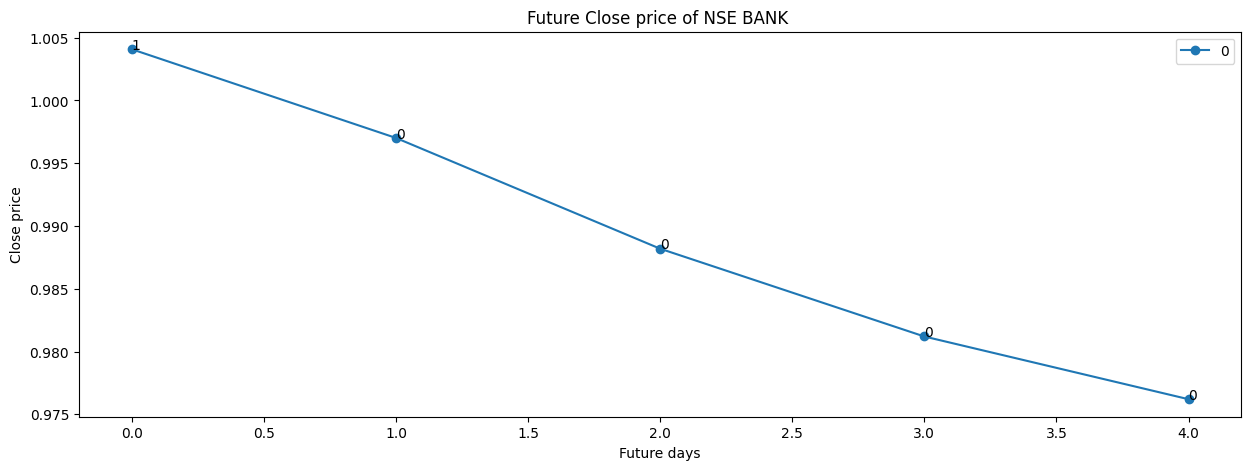

In [ ]:
future_results = np.array(future_prediction).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of NSE BANK ")


In [ ]:
model.save("latest_nsebank_model.keras")

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 284.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 502.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 501.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 610.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 636.2 kB/s eta 0:00:00


2024-06-20 19:24:31.230 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-20 19:24:31.236 Session state does not function when running a script without `streamlit run`
[*********************100%%**********************]  1 of 1 completed


4/4 [==============================] - 2s 92ms/step
<class 'list'>
1/1 [==============================] - 0s 58ms/step
<class 'list'>
1/1 [==============================] - 0s 61ms/step
<class 'list'>
1/1 [==============================] - 0s 60ms/step
<class 'list'>
1/1 [==============================] - 0s 64ms/step
<class 'list'>
1/1 [==============================] - 0s 61ms/step
<class 'list'>
1/1 [==============================] - 0s 83ms/step
<class 'list'>
1/1 [==============================] - 0s 74ms/step
<class 'list'>
1/1 [==============================] - 0s 59ms/step
<class 'list'>
1/1 [==============================] - 0s 70ms/step
<class 'list'>
1/1 [==============================] - 0s 61ms/step
[[51811.47794173]
 [51762.59956157]
 [51701.57466503]
 [51653.21041223]
 [51618.65421009]
 [51593.02494094]
 [51571.5956841 ]
 [51551.46308365]
 [51531.44303874]
 [51511.49102192]]


<ipython-input-72-0efcff5370ba>:108: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.yticks(range(min(list(map(int, future_results))), max(list(map(int, future_results))),100))


DeltaGenerator()

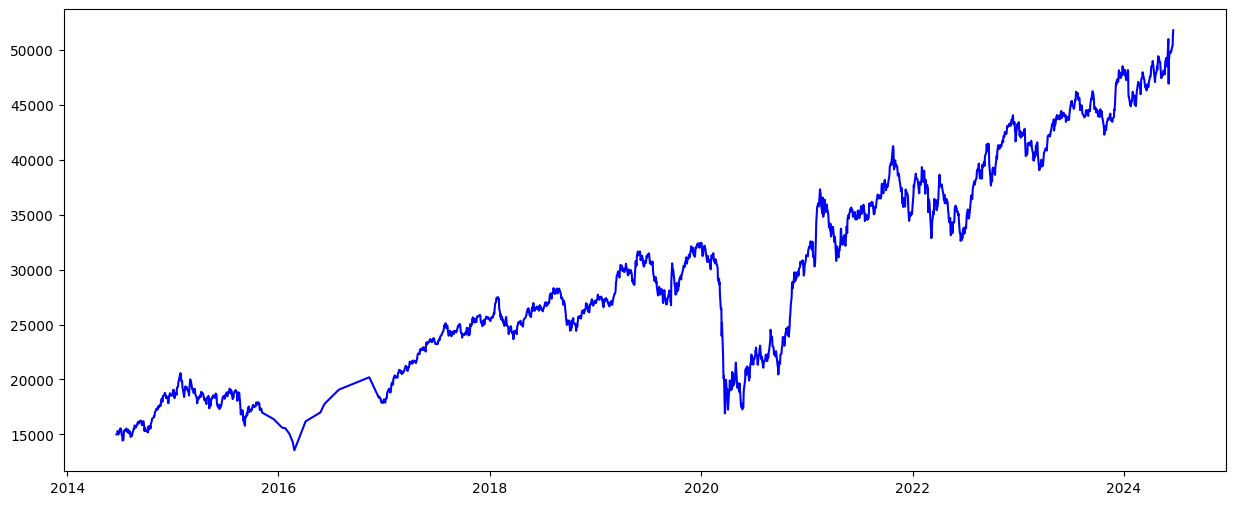

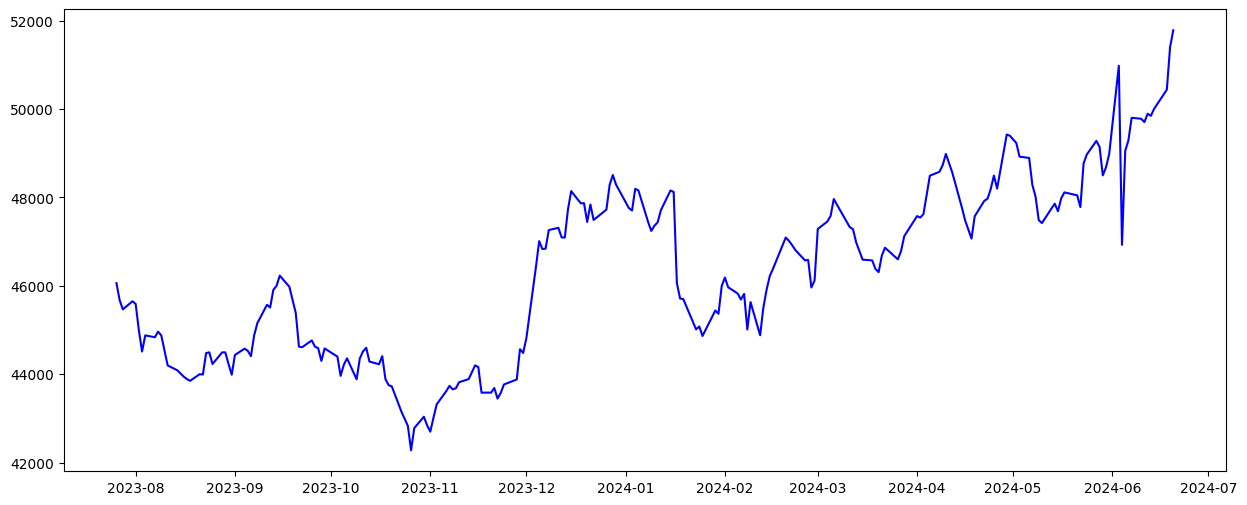

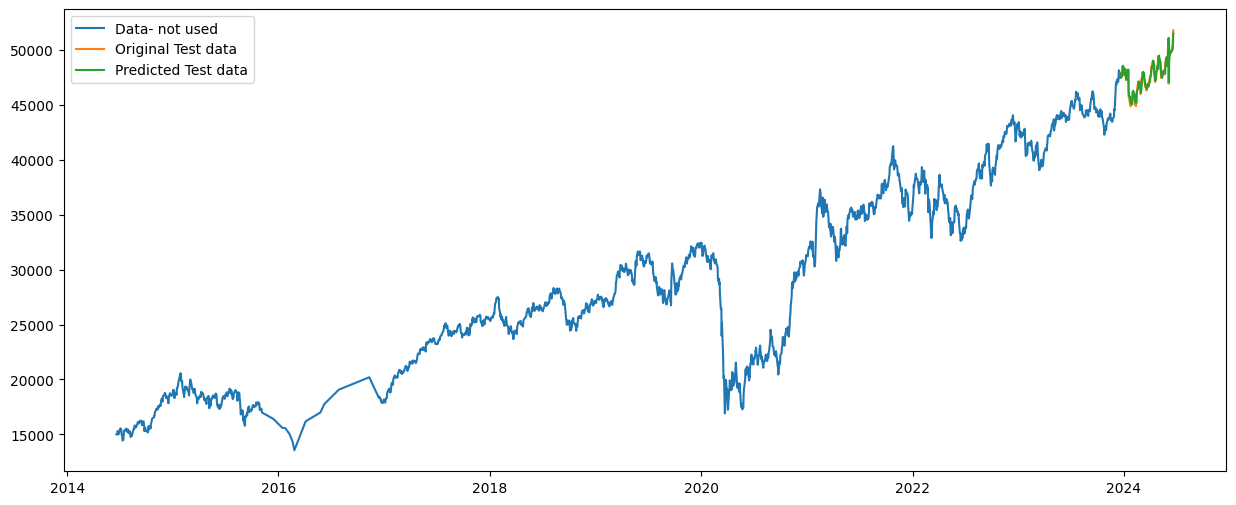

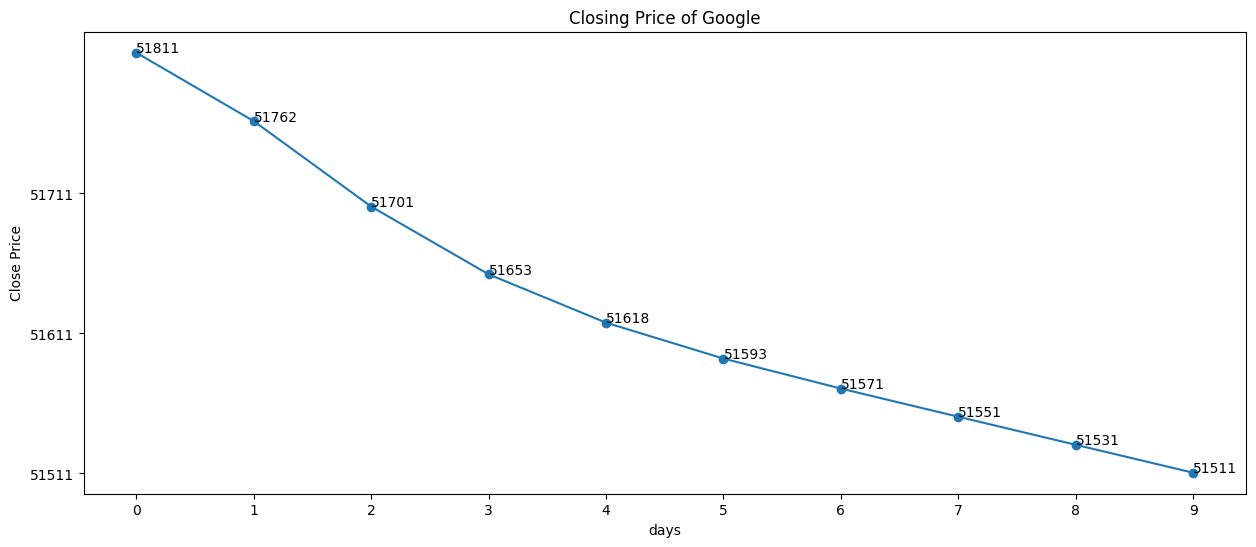

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import yfinance as yf

st.title("Bank NIFTY Price Predictor App")

stock = "^NSEBANK"#"BTC-USD"

from datetime import datetime
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

stock = st.text_input("Enter the stock here",stock)

bit_coin_data = yf.download(stock, start, end)

model = load_model("/content/latest_nsebank_model.keras")
st.subheader("Bank NIFTY Data")
st.write(bit_coin_data)

splitting_len = int(len(bit_coin_data)*0.9)
x_test = pd.DataFrame(bit_coin_data.Close[splitting_len:])

st.subheader('Original Close Price')
figsize = (15,6)
fig = plt.figure(figsize=figsize)
plt.plot(bit_coin_data.Close,'b')
st.pyplot(fig)

st.subheader("Test Close Price")
st.write(x_test)

st.subheader('Test Close Price')
figsize = (15,6)
fig = plt.figure(figsize=figsize)
plt.plot(x_test,'b')
st.pyplot(fig)

# preprocess the data
# preprocessing the data into [0 to 1] range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x_test[['Close']].values)

x_data = []
y_data = []
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

predictions = model.predict(x_data)
inv_pre = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_data)


ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_pre.reshape(-1)
 } ,
    index = data.index[splitting_len+100:]
)
st.subheader("Original values vs Predicted values")
st.write(ploting_data)

st.subheader('Original Close Price vs Predicted Close price')
fig = plt.figure(figsize=(15,6))
plt.plot()

plt.plot(pd.concat([bit_coin_data.Close[:splitting_len+100],ploting_data], axis=0))
plt.legend(["Data- not used", "Original Test data", "Predicted Test data"])
st.pyplot(fig)

st.subheader("Future Price values")
# st.write(ploting_data)

last_100 = data[['Close']].tail(100)
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
prev_100 = np.copy(last_100).tolist()

def predict_future(no_of_days,prev_100):
    future_predictions = []
    for i in range(int(no_of_days)):
        print(type(prev_100))
        next_day = model.predict(prev_100).tolist()
        prev_100[0].append(next_day[0])
        prev_100 = [prev_100[0][1:]]
        future_predictions.append(scaler.inverse_transform(next_day))
    return future_predictions

no_of_days = int(st.text_input("Enter the No of days to be predicted from current date : ","10"))
future_results = predict_future(no_of_days,prev_100)
future_results = np.array(future_results).reshape(-1,1)
print(future_results)
fig = plt.figure(figsize=(15, 6))
plt.plot(pd.DataFrame(future_results), marker = 'o')
for i in range(len(future_results)):
    plt.text(i, future_results[i], int(future_results[i][0]))
plt.xlabel('days')
plt.ylabel('Close Price')
plt.xticks(range(no_of_days))
plt.yticks(range(min(list(map(int, future_results))), max(list(map(int, future_results))),100))
plt.title('Closing Price of Google')
st.pyplot(fig)

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

st.title("Bank NIFTY Price Predictor App")

# User input for stock ticker symbol
stock = st.text_input("Enter the stock symbol here (e.g., ^NSEBANK)", "^NSEBANK")

# Download stock data using yfinance
end = pd.Timestamp.now()
start = end - pd.DateOffset(years=10)
bit_coin_data = yf.download(stock, start=start, end=end)

# Load the pre-trained LSTM model
model = load_model("/content/latest_nsebank_model.keras")

# Display Bank NIFTY data
st.subheader("Bank NIFTY Data")
st.write(bit_coin_data)

# Split data into training and testing sets
splitting_len = int(len(bit_coin_data) * 0.9)
x_test = bit_coin_data['Close'][splitting_len:]

# Plot original and test close prices
st.subheader('Original Close Price')
fig = plt.figure(figsize=(15, 6))
plt.plot(bit_coin_data['Close'], 'b')
st.pyplot(fig)

st.subheader("Test Close Price")
st.write(x_test)
fig = plt.figure(figsize=(15, 6))
plt.plot(x_test, 'b')
st.pyplot(fig)

# Preprocess the data for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(x_test.values.reshape(-1, 1))

x_data = []
y_data = []
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i - 100:i, 0])
    y_data.append(scaled_data[i, 0])

x_data, y_data = np.array(x_data), np.array(y_data)

# Predictions using the LSTM model
predictions = model.predict(x_data.reshape(x_data.shape[0], x_data.shape[1], 1))
inv_pre = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_data.reshape(-1, 1))

# Create a DataFrame for plotting
plotting_data = pd.DataFrame({
    'Original Test Data': inv_y_test.reshape(-1),
    'Predictions': inv_pre.reshape(-1)
}, index=x_test.index[100:])

# Plot original vs predicted close prices
st.subheader("Original vs Predicted Close Prices")
fig = plt.figure(figsize=(15, 6))
plt.plot(bit_coin_data['Close'][:splitting_len + 100], label='Data - not used')
plt.plot(pd.concat([bit_coin_data['Close'][:splitting_len + 100], plotting_data['Predictions']]), label='Predicted Test data')
plt.legend()
st.pyplot(fig)

# Function to predict future prices
def predict_future(no_of_days, prev_100):
    future_predictions = []
    for i in range(no_of_days):
        next_day = model.predict(prev_100).reshape(1, 1)
        future_predictions.append(next_day)
        prev_100 = np.append(prev_100[1:], next_day).reshape(1, -1, 1)
    return future_predictions

# Prepare data for future prediction
last_100 = bit_coin_data[['Close']].tail(100)
last_100_scaled = scaler.fit_transform(last_100.values).reshape(1, -1, 1)

# User input for number of days to predict
no_of_days = int(st.text_input("Enter the number of days to predict from the current date:", "10"))

# Predict future prices
future_results = predict_future(no_of_days, last_100_scaled)
future_results = np.array(future_results).reshape(-1, 1)

# Display future predicted prices
st.subheader("Future Price Predictions")
st.write(pd.DataFrame(future_results, columns=["Predicted Close Price"]))

# Plot future predicted prices
fig = plt.figure(figsize=(15, 6))
plt.plot(future_results, marker='o')
for i in range(len(future_results)):
    plt.text(i, future_results[i], int(future_results[i][0]))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.xticks(range(no_of_days))
plt.title('Predicted Closing Price')
st.pyplot(fig)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 23ms/step


DeltaGenerator()